In [108]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Empirical Distribution of a statistic

In [69]:
united = Table.read_table('data/united.csv')
united = united.where('Delay', are.below(200))
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


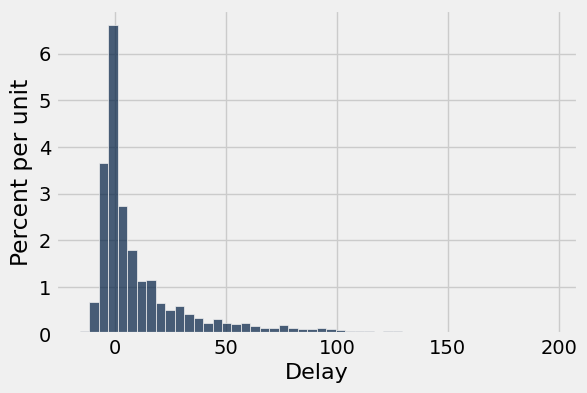

In [80]:
united.hist('Delay', bins=50)

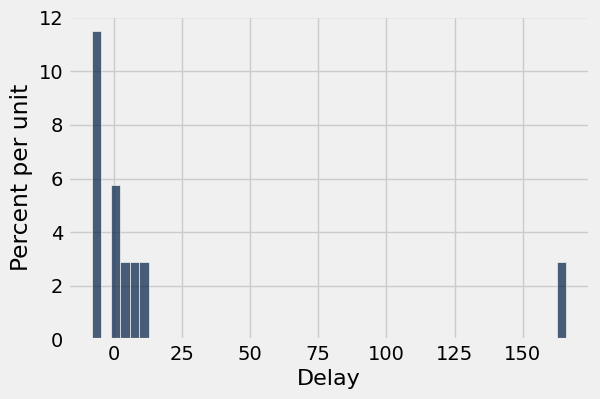

In [82]:
united.sample(10).hist('Delay', bins=50)

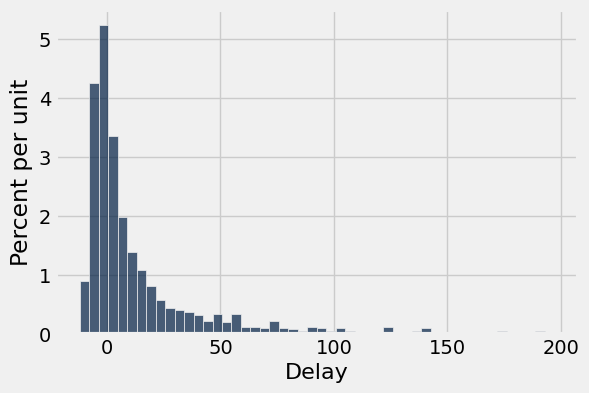

In [83]:
united.sample(1000).hist('Delay', bins=50)

# Swain vs. Alabama ##

In [57]:
n_people = 3_300_000
black_proportion = 0.26
white_proportion = 0.74
n_panel = 100

In [58]:
black = np.repeat('black', int(0.26*n_people))
white = np.repeat('white', int(0.64*n_people))
people = np.append(black, white)
people = Table().with_column('people', people)

In [59]:
panel = people.sample(n_panel).group('people')
panel

people,count
black,20
white,80


In [60]:
panel.column('count')/100

array([ 0.2,  0.8])

Note that the exact value of n_people is irrelevant. We get the same results if we set it e.g. to 100. 

Also note, that we had to write a lot of code. But there is an easier way: Introducing `sample_proportions()`

In [61]:
population_proportions = make_array(black_proportion, white_proportion)
population_proportions

array([ 0.26,  0.74])

In [62]:
sample_proportions(n_panel, population_proportions)

array([ 0.29,  0.71])

In [64]:
def panel_proportion():
    return sample_proportions(n_panel, population_proportions).item(0)

In [65]:
panel_proportion()

0.3

In [66]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * n_panel
    panels = np.append(panels, new_panel)

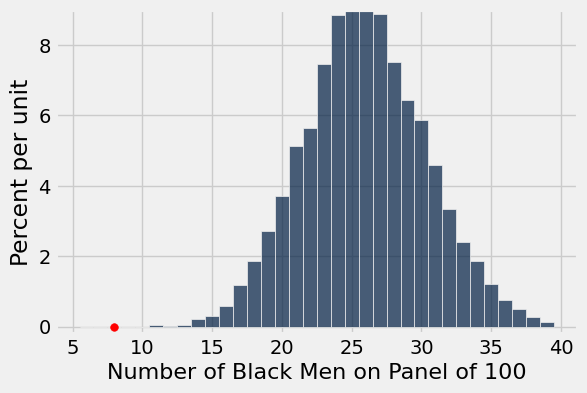

In [88]:
panel = Table().with_column('Number of Black Men on Panel of 100', panels)
panel.hist(bins=np.arange(5.5, 40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

# Mendel and Pea Flowers ##

In [8]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [9]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.73842842,  0.26157158])

In [10]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [11]:
purple_flowers()

74.3810548977395

In [100]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
    
flowers = Table().with_column('Percent of purple flowers in sample of 929', purples)

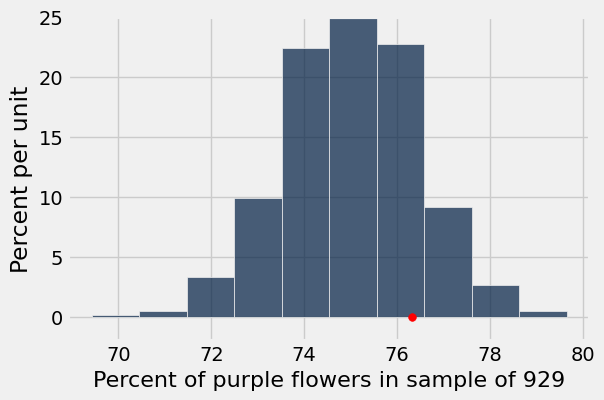

In [101]:
flowers.hist('Percent of purple flowers in sample of 929')

# Plotting details; ignore this code
plots.ylim(-0.02, 0.25)
plots.scatter(observed_purples * 100, 0, color='red', s=30);

In [102]:
discrepancy = abs(flowers.column('Percent of purple flowers in sample of 929')-75)
flowers = flowers.with_column('discrepancy', discrepancy)

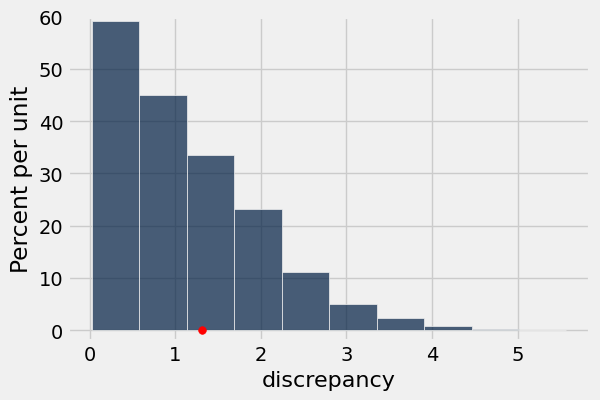

In [107]:
flowers.hist('discrepancy')

# Plotting details; ignore this code
plots.ylim(-0.02, 0.6)
plots.scatter(abs(observed_purples * 100 - 75), 0, color='red', s=30);

In [105]:
abs(observed_purples * 100 - 75)

1.318622174381062